 # DATA SCIENCE PROJECT



In [ ]:


import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
import seaborn as sns




In [ ]:

data = pd.read_csv(r'C:\MinGW\bin\C progms\Machine_Learning\modified_file.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
data.head(15)


In [ ]:

data.describe()


In [ ]:

print(data.dtypes)


In [ ]:
#handle the arrays
data.replace('Yes', '1', inplace=True)
data.replace('No', '0', inplace=True)
data['Ascites']=data['Ascites'].replace({np.nan:1,'Mild':2, 'Moderate/Severe':3})
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
data['PS'] = data['PS'].replace({'Active': 0, 'Restricted':1, 'Ambulatory':2, 'Selfcare':3, 'Disabled':4})
data['Encephalopathy'] = data['Encephalopathy'].replace({np.nan: 1, 'Grade I/II':2, 'Grade III/IV':3})


data.head(10)

In [ ]:

print(data.dtypes)

# Graphs

In [ ]:

data_die = data[data['Class'] == 'Dies']
data_live = data[data['Class'] == 'Lives']

# general histogram with title
data.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram for all data', fontsize=16)
plt.tight_layout()
plt.show()

# histogram for people who died
data_die.drop('Class', axis=1).hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram for people who died', fontsize=16)
plt.tight_layout()
plt.show()

# histogram for people who lived
data_live.drop('Class', axis=1).hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram for people who lived', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#graph with distribution of patient ages
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

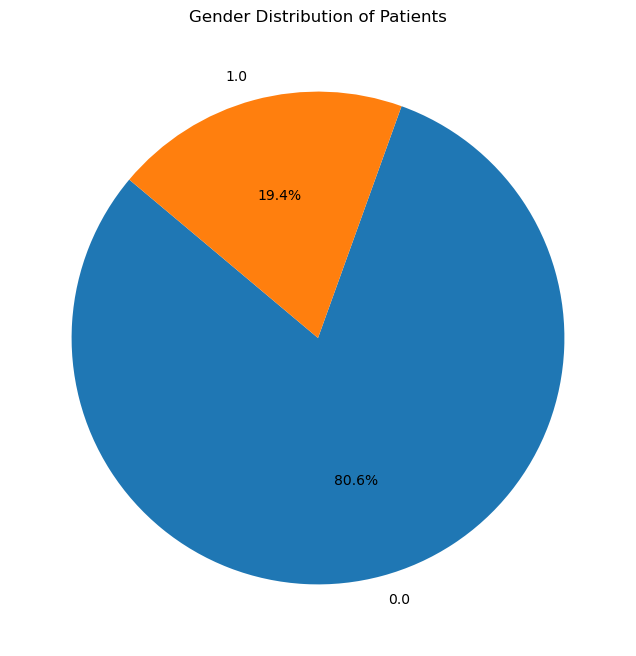

In [58]:
##graph gender distribution of patients
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Patients')
plt.ylabel('')
plt.show()


In [ ]:
#graph correlation heatmap
data_new = data
data_new['Class']=data_new['Class'].replace({'Dies': 0, 'Lives': 1})

corr = data_new.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 4})  

plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#graph of outcomes
outcome_counts = data['Class'].value_counts()

plt.figure(figsize=(10, 6))
outcome_counts.plot.bar(color=['blue', 'red'])
plt.title('Outcome Distribution (Lives vs. Dies)')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#graph age vs iron
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Iron'], alpha=0.5)
plt.title('Scatter Plot of Iron vs. Age')
plt.xlabel('Age')
plt.ylabel('Iron')
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
#resolve all missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
object_cols = data.select_dtypes(include=['object']).columns

# Impute numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Impute object columns with the most frequent value
object_imputer = SimpleImputer(strategy='most_frequent')
data[object_cols] = object_imputer.fit_transform(data[object_cols])

#change the type of the columns
for col in data.columns:
    if data[col].dtypes=='object' and col!='Class':
        data[col]=data[col].astype(int)
data.head(10)

In [ ]:
print(data.dtypes)

# DECISION TREE


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


target_values = data['Class'].values
columns_list = data.columns[:-1].tolist()
inputs_values=data[columns_list].values


#training/test split
(training_inputs, testing_inputs, training_classes, testing_classes)= train_test_split(inputs_values,target_values , test_size=0.30, random_state=1)

# Scale the features
scaler = StandardScaler()
training_inputs = scaler.fit_transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
decision_tree_classifier= DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

In [ ]:
# Make predictions on the testing set
predictions = decision_tree_classifier.predict(testing_inputs)

# Compare the predicted labels with the actual labels
correct_predictions = predictions == testing_classes

# Print the incorrectly predicted samples with their corresponding titles
print("Incorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if not correct:
        print(f"Patient: {index+1}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

# Print the correctly predicted samples with their corresponding titles
print("\nCorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if correct:
        print(f"Patient: {index+1}, Predicted={predictions[index]}, Actual={testing_classes[index]}")


# CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import StratifiedKFold
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), inputs_values,target_values)

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, inputs_values,target_values, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(inputs_values,target_values, test_size=0.80, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(pd.DataFrame(X_train).info())
print(pd.DataFrame(y_train).info())

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_train = numeric_imputer.fit_transform(X_train)
X_test = numeric_imputer.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
# Make predictions on the training set
train_predictions = knn.predict(X_train)

# Calculate the training accuracy
train_accuracy = sum(train_predictions == y_train) / len(y_train)

# Make predictions on the test set
test_predictions = knn.predict(X_test)

# Calculate the test accuracy
test_accuracy = sum(test_predictions == y_test) / len(y_test)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Test Predictions:", test_predictions)
print("Test:", X_test)
print("Train predictions:", train_predictions)
print("Train:", X_train)